# **3.Correlation Analysis**

## Objectives

## Inputs

## Outputs


---

# Change working directory

Change the working directory from its current folder to its parent folder.
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp'

---

# Data exploration and correlation analysis

In [4]:
import pandas as pd
df1 = pd.read_csv("/workspace/heritage-housing-mvp/outputs/datasets/cleaned/HousePricesCleaned.csv")
df1.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.000000,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.000000,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,2.869214,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.000000,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


Since the whole dataset has 4 categorical variables that are of object data type then it is needed that those data types would be encoded into numerical in order to calculate correlation coefficients.

Use OneHotEncoder since that will encode the categories into 0 or 1. Thus making more columns with each categorical meaning. Which enables to evaluate each of categorical values relation coefficient to Sale Price.

In [5]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df1.columns[df1.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df1)
print(df_ohe.shape)
df_ohe.columns.tolist()


(1460, 38)


['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice',
 'BsmtExposure_No',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_Av',
 'BsmtExposure_None',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_Unf',
 'BsmtFinType1_Rec',
 'BsmtFinType1_None',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_LwQ',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageFinish_None',
 'GarageFinish_Fin',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'KitchenQual_Ex',
 'KitchenQual_Fa']

Through encoding, the modified dataset has now 38 columns.

Now it is defined functions that will calculate the correlations, create heatmaps and display them.

The heatmaps are going to be saved so they can be used later in the documentation.

This code bit has been taken from Code Institute's churnometer

Create folders first

In [9]:
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

def heatmap_corr(df, threshold, figsize=(20,12), font_annot = 8):
    """
    Function to create heatmap using correlations
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    """
    Function to create heatmap using pps.
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                        mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                        linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()

def CalculateCorrAndPPS(df):
    """
    Function to calculate correlations and pps.
    """
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method='pearson')

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix

def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                        figsize=(20, 12), font_annot=8):
    """
    Function to display the correlations and pps.
    """

    print("\n")
    print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyze multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects lienar or non-linear relationships between two columns. \n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

A function is called which calculates the correlation and pps. Spearman and Pearson correlations are passed to evaluate the linear and monotonic relationships respectively between the features and the target.

In [10]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_ohe)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

          count   mean    std  min  25%  50%  75%    max
ppscore  1406.0  0.019  0.071  0.0  0.0  0.0  0.0  0.945


The distribution of PPS scores reveals a skewed pattern heavily concentrated at zero, suggesting a prevalence of weak predictive relationships. Despite the majority of scores being low, the presence of outliers with values up to 0.945 indicates sporadic instances of strong predictive power. Therefore, determining a suitable threshold for the heatmap should balance capturing both the common weak relationships and the occasional strong ones.

Display the correlations and pps by calling the DisplayCorrAndPPS function that was defined above



* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



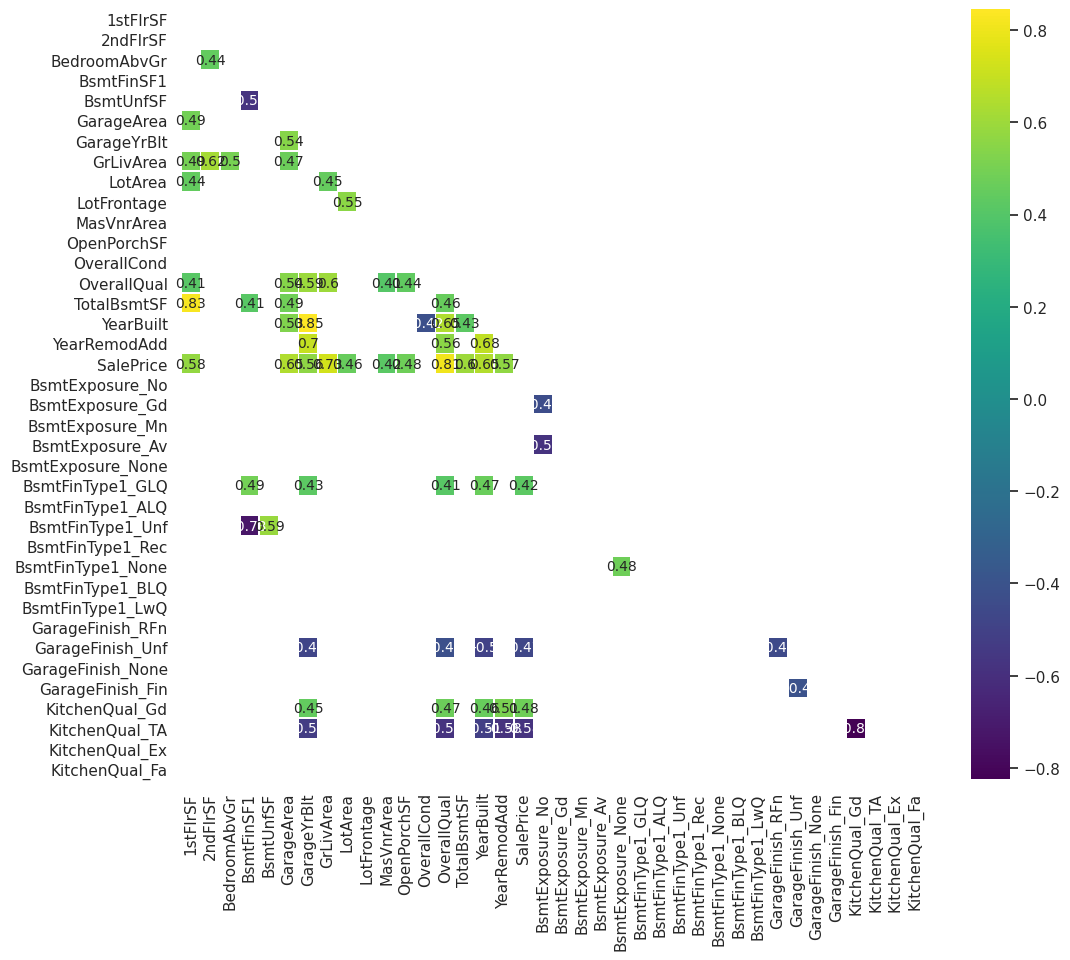



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continous variables 



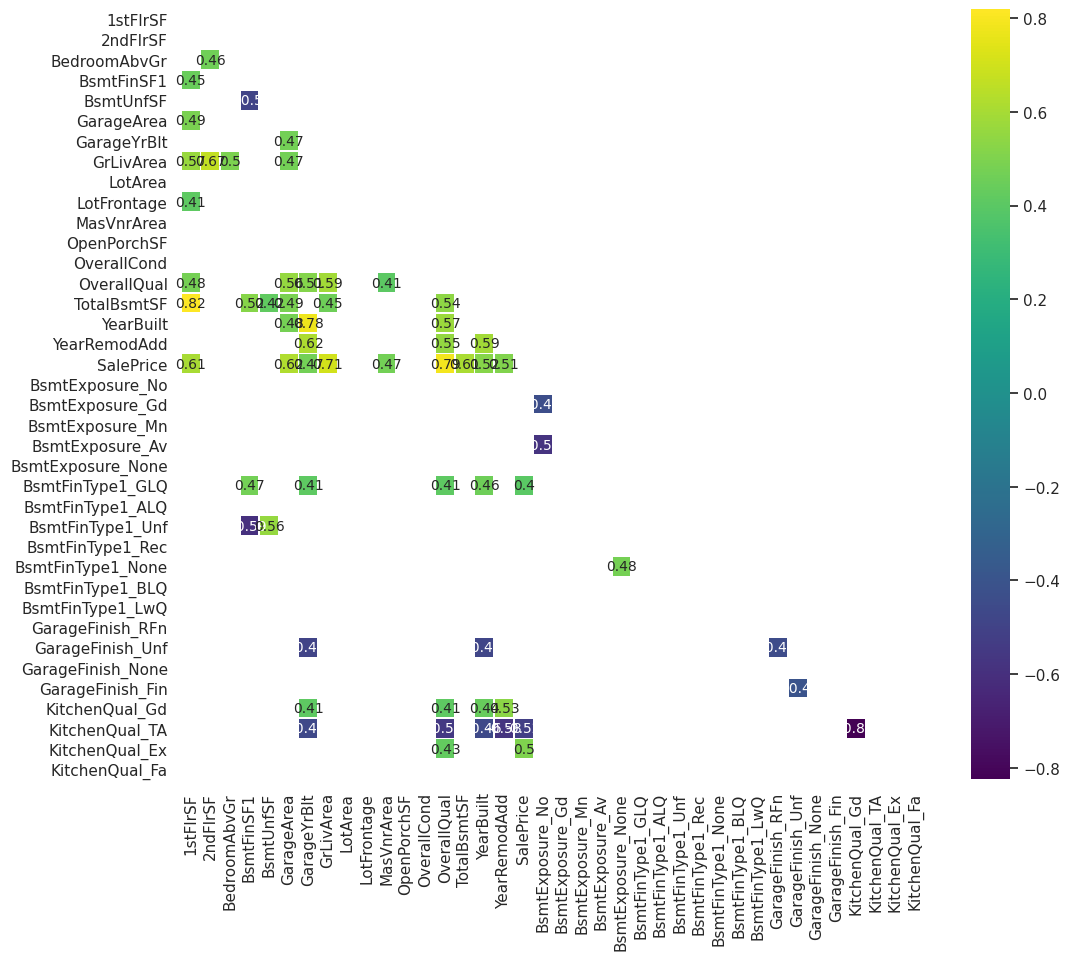



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects lienar or non-linear relationships between two columns. 
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



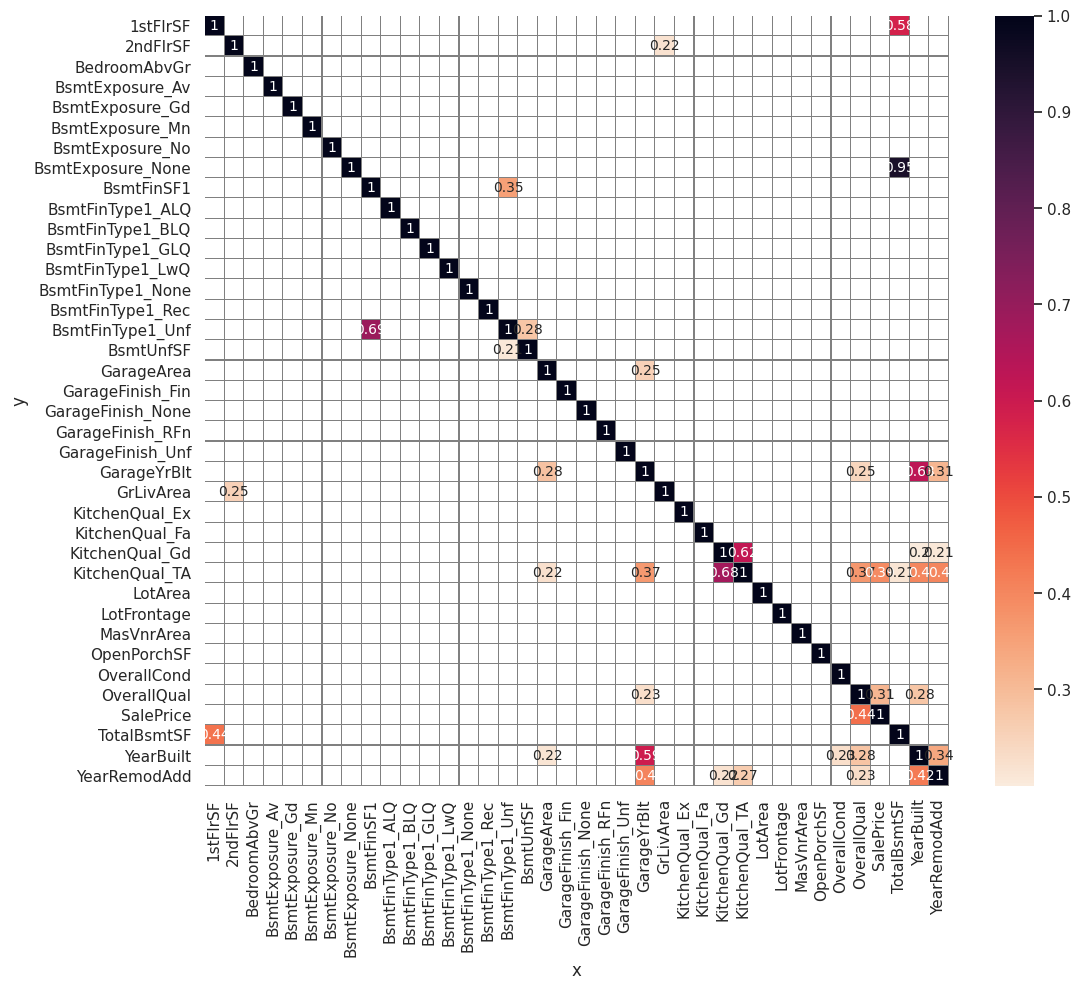

In [11]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                    df_corr_spearman = df_corr_spearman,
                    pps_matrix = pps_matrix,
                    CorrThreshold = 0.4, PPS_Threshold = 0.2,
                    figsize=(12, 10), font_annot=10)

When the correlations are calculated with the .corr() method, the return value is a pandas series, and the first item is the correlation between SalePrice and SalePrice. Since it is correlation between itself then [1:] is used to exclude it from the series.
Next, sort the remaining values considering the absolute value, which is done by setting key=abs.
Top 10 values are going to be shown.

In [28]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman_positive = corr_spearman[corr_spearman > 0].head(10)
corr_spearman_positive

OverallQual         0.809829
GrLivArea           0.731310
YearBuilt           0.652682
GarageArea          0.649379
TotalBsmtSF         0.602725
1stFlrSF            0.575408
YearRemodAdd        0.571159
GarageYrBlt         0.563256
KitchenQual_Gd      0.478583
OpenPorchSF         0.477561
LotArea             0.456461
BsmtFinType1_GLQ    0.423896
MasVnrArea          0.415906
LotFrontage         0.375590
GarageFinish_Fin    0.374053
KitchenQual_Ex      0.346387
BsmtFinSF1          0.301871
2ndFlrSF            0.279845
GarageFinish_RFn    0.255720
BsmtExposure_Gd     0.243258
BedroomAbvGr        0.210835
BsmtUnfSF           0.185197
BsmtExposure_Av     0.150432
BsmtExposure_Mn     0.055217
Name: SalePrice, dtype: float64

In [29]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson_positive = corr_pearson[corr_pearson > 0]
corr_pearson_positive

OverallQual         0.790982
GrLivArea           0.708624
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
MasVnrArea          0.472614
GarageYrBlt         0.466754
BsmtFinType1_GLQ    0.400764
BsmtFinSF1          0.386420
GarageFinish_Fin    0.376918
LotFrontage         0.334771
KitchenQual_Gd      0.321641
OpenPorchSF         0.315856
2ndFlrSF            0.312479
BsmtExposure_Gd     0.307298
LotArea             0.263843
BsmtUnfSF           0.214479
BedroomAbvGr        0.154476
GarageFinish_RFn    0.148970
BsmtExposure_Av     0.136793
BsmtExposure_Mn     0.043493
Name: SalePrice, dtype: float64

Now combine the both correlations.

In [33]:
combined_corr = pd.concat([corr_spearman_positive, corr_pearson_positive])
combined_corr = combined_corr.groupby(combined_corr.index).max().sort_values(ascending=False)
top_10_features = combined_corr.head(11)

print(top_10_features)

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Ex    0.504094
KitchenQual_Gd    0.478583
OpenPorchSF       0.477561
Name: SalePrice, dtype: float64


It was taken 11 values since while analyzing this dataset KitchenQual_Ex and KitchenQual_Gd both were included in the list. However it was needed 10 different features thus KitchenQual Ex/Gd in general can be seen as high importance.

The variables that are going to be focused on:
1. OverallQual
2. GrLivArea
3. YearBuilt
4. GarageArea
5. TotalBsmtSF
6. 1stFlrSF
7. YearRemodAdd
8. GarageYrBlt
9. KitchenQual
10. OpenPorchSF

---

## EDA on the variables

Make an exploratory analysis on the data using the features that have moderate or high correlation with the target variable SalePrice. By creating a separate DataFrame for the EDA by adding SalePrice to it and insights can be drawn.

In [35]:
vars_to_study = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt', 'KitchenQual', 'OpenPorchSF']

In [36]:
df_eda = df1.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,OverallQual,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,1stFlrSF,YearRemodAdd,GarageYrBlt,KitchenQual,OpenPorchSF,SalePrice
0,7,1710,2003,548,856,856,2003,2003.0,Gd,61,208500
1,6,1262,1976,460,1262,1262,1976,1976.0,TA,0,181500
2,7,1786,2001,608,920,920,2002,2001.0,Gd,42,223500
3,7,1717,1915,642,756,961,1970,1998.0,Gd,35,140000
4,8,2198,2000,836,1145,1145,2000,2000.0,Gd,84,250000


Business requirement 1 requires analyzing the Sale Price in relation to all features. Correlation analysis was already done previously. Next are bivariate plots.

In [38]:
def plot_lm(df, col, target_var):
    """
    Function to create linear regerssion plots of the target and
    features with continous values.
    """
    plt.figure(figsize=(12, 5))
    sns.lmplot(data=df, x=col, y=target_var, ci=None)
    plt.title(f"{col}", fontsize=20)
    plt.show()

def plot_line(df, col, target_var):
    """
    Function to create a line plot of the target and time variables (years).
    """
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x=col, y=target_var)
    plt.title(f"{col}", fontsize=20)
    plt.show()

def plot_blox(df, col, target_var):
    """
    Function to create a box plot of the target and categorical variables.
    """
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y=target_var)
    plt.title(f"{col}", fontsize=20)
    plt.show()

for col in vars_to_study:
    if len(df_eda[col].unique()) <= 10:
        plot_box(df_eda, col, target_var)
        print("\n\n")
    else:
        if col in time:
            plot_line(df_eda, col, target_var)
            print("\n\n")
        else:
            plot_lm(df_eda, col, target_var)
            print("\n\n")

NameError: name 'plot_box' is not defined